# 1. 데이터셋 다운로드

In [1]:
# download dataset by url link
!wget -O dataset.zip https://www.dropbox.com/s/pj6zfdf5f5l6rhe/imitation_22ver.zip?dl=0
# unzip zip file
!unzip -qq dataset.zip
# delete downloaded zip file
!rm -rf dataset.zip
# rename data path
!mv imitation_22ver/ dataset/

--2022-12-10 13:14:23--  https://www.dropbox.com/s/pj6zfdf5f5l6rhe/imitation_22ver.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/pj6zfdf5f5l6rhe/imitation_22ver.zip [following]
--2022-12-10 13:14:24--  https://www.dropbox.com/s/raw/pj6zfdf5f5l6rhe/imitation_22ver.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5d965add076d2b9ce81f55f8d8.dl.dropboxusercontent.com/cd/0/inline/ByUCkrjI2cd72clUoq-6iH24X2waarimM7XMoM9Ei4tqa6x6aGSCgMA8uZjr8OTBckxiADancEkRtXO7tcSQecXeVZ2J98lzGhHEFUa361qfY5tVibw-quT_R-c32LaM9W1K8cKeYF3cRH4Hs1qC5Vp-5QKT7Qi_e02TXPFLOEbIQg/file# [following]
--2022-12-10 13:14:24--  https://uc5d965add076d2b9ce81f55f8d8.dl.dropboxusercontent.com/cd/0/inline/ByUCkrjI2cd72clUoq-6iH24X2waarimM7XMoM9Ei4tqa6x6aGSCgM

# 2. EDA (Exploratory Data Analysis)

In [2]:
# 데이터 기본 디렉토리 지정
import os
data_dir = os.path.join(os.getcwd(), 'dataset')
print(os.listdir(data_dir))

['images', '.DS_Store', 'label.csv']


In [3]:
# label.csv 파일 탐색 - 조향각에 대한 numerical 값
label_path = os.path.join(data_dir, 'label.csv')

import pandas as pd
label_df = pd.read_csv(label_path)
label_df

,img,steer
0,329571.jpg,0.019361
1,329580.jpg,0.090791
2,329590.jpg,0.090791
3,329603.jpg,-0.007297
4,329610.jpg,-0.056953
...,...,...
1647,411920.jpg,0.001657
1648,411930.jpg,0.024448
1649,411940.jpg,0.027501
1650,411950.jpg,0.036455


count    1652.000000
mean       -0.048909
std         0.130272
min        -0.500000
25%        -0.111353
50%        -0.013198
75%         0.021193
max         0.500000
Name: steer, dtype: float64


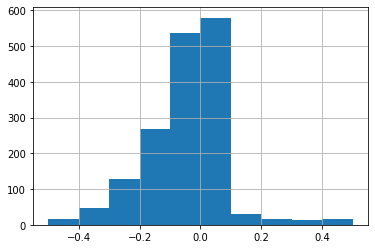

In [4]:
# steer 값 탐색 , 좀 더 다양한 시각적 분석
print(label_df['steer'].describe())

label_df['steer'].hist()
##직선주행이 제일 많음

## 우회전 데이터 추가 : steer값 -0.09이하인걸 -1를 곱해줌 
## 그결과 데이터가 약 600개정도 추가됨
## 자세한건 보고서에 작성하였습니다.

In [5]:
# X,Y 데이터 시각화 확인
# 이미지 augmentaion
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import csv
import pandas as pd


# os, 를 이용한 
def load_image(img_name):
    # https://m.blog.naver.com/nostresss12/221950215408
    path = os.path.join(data_dir, 'images', img_name)
    img_data = Image.open(path).convert("RGB")
    # img_data = Image.open("/content/dataset/images/329641.jpg").convert("L")

    # raise NotImplementedError

    return img_data


new_jpg = 10000
def visualize_augm(img_name, label, new_jpg):

    img = load_image(img_name)
    im1 = img.transpose(Image.FLIP_LEFT_RIGHT)
    label *= -1.0
    new_jpg = str(new_jpg)+'.jpg'
    path = os.path.join(data_dir,'images',new_jpg)
    im1.save(path, 'JPEG')

    with open(label_path, 'a', newline='') as myfile:
        wr = csv.writer(myfile)
        wr.writerow([new_jpg,label])
    
for i in label_df.index:
  img_name = label_df['img'][i]
  label = label_df[label_df['img'] == img_name]['steer'].values[0]
  if label <= -0.09:
    visualize_augm(img_name, label,new_jpg)
    new_jpg+=1

label_df = pd.read_csv(label_path)
label_df

,img,steer
0,329571.jpg,0.019361
1,329580.jpg,0.090791
2,329590.jpg,0.090791
3,329603.jpg,-0.007297
4,329610.jpg,-0.056953
...,...,...
2160,20508.jpg,0.108045
2161,20509.jpg,0.125961
2162,20510.jpg,0.136753
2163,20511.jpg,0.142251


count    2165.000000
mean        0.008520
std         0.159629
min        -0.500000
25%        -0.085449
50%         0.010000
75%         0.098680
max         0.500000
Name: steer, dtype: float64


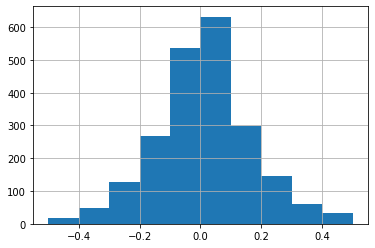

In [6]:
print(label_df['steer'].describe())
label_df['steer'].hist()

Index:  1001
Image name:  346780.jpg
Steer:  0.0329952146987416
Image shape:  (256, 512, 3)


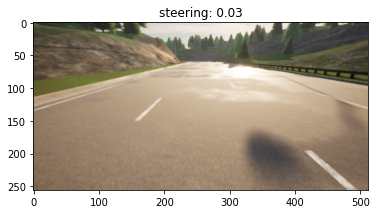

In [7]:
# X,Y 데이터 시각화 확인
# 이미지 augmentaion
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def load_image(img_name):
    # https://m.blog.naver.com/nostresss12/221950215408
    
    #raise NotImplementedError
    #os 활용
    img_path = os.path.join(data_dir,'images',img_name)
    img_data = Image.open(img_path).convert('RGB')
    #img_data = Image.open(img_name).convert('L')

    return img_data


def visualize_data(img_name, label):

    img = load_image(img_name)
    FlipImage = img
    FlipImage.show()
    print("Image shape: ", np.array(img).shape)
    
    plt.imshow(img)
    plt.title("steering: {:.2f}".format(label))
    plt.show()

i = np.random.choice(label_df.index)
img_name = label_df['img'][i]
label = label_df[label_df['img'] == img_name]['steer'].values[0]
print("Index: ", i)
print("Image name: ", img_name)
print("Steer: ", label)

visualize_data(img_name, label)

# 3. 딥러닝 모델 생성

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation

# end to end 
def get_model():

    model = Sequential()

    # ▼▼▼▼ Nvidia의 End-to-End 모델 구현 ▼▼▼▼
    # input data shape: (None, 256, 512, 3)
    # output data shape: (None, 1)
    

    model.add(Conv2D(24,5, strides=(1,1), padding='valid', input_shape=(256,512,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))
    
    model.add(Conv2D(36,5, strides=(1,1), padding='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))
    model.add(Conv2D(48,5, strides=(1,1), padding='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))
    model.add(Conv2D(64,3, strides=(1,1), padding='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))
    model.add(Conv2D(64,3, strides=(1,1), padding='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))
    model.add(Flatten())
    
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(10,activation='relu'))
    
    model.add(Dense(1)) 
    
    # ▲▲▲▲ Nvidia의 End-to-End 모델 구현 ▲▲▲▲

    return model

model = get_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 508, 24)      1824      
                                                                 
 batch_normalization (BatchN  (None, 252, 508, 24)     96        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 508, 24)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 254, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 250, 36)      21636     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 250, 36)     1

# 4. 학습 및 검증 데이터 분할

In [9]:
# Set the number of training and validation data
VAL_RATIO = 0.2 

len_val = int(np.ceil(len(label_df) * VAL_RATIO))
len_train = int(len(label_df) - len_val)

print(len(label_df), len_train, len_val)

def split_train_val(df, val_ratio):
    '''입력받은 데이터프레임를 ratio 기준으로 
    학습용 데이터프레임과 검증용 데이터프레임으로 분할
    입력 df: 데이터프레임
    입력 val_ratio: 검증데이터 비율
    출력 train_df: 학습용 데이터프레임
    출력 val_df: 검증용 데이터프레임'''
        
        
    # ▼▼▼▼ split_train_val 함수 구현을 위한 코드 작성 ▼▼▼▼

    #raise NotImplementedError

    len_val = int(np.ceil(len(label_df) * VAL_RATIO))
    len_train = int(len(label_df) - len_val)
    
    val_indices = np.random.choice(df.index, len_val, replace=False)
    df_val = df.iloc[val_indices].reset_index(drop=True) 
    val_indices = sorted(val_indices,reverse = True)
    df_train = df.drop(val_indices,axis=0).reset_index(drop=True) 
    # ▲▲▲▲ split_train_val 함수 구현을 위한 코드 작성 ▲▲▲▲

    return df_train, df_val

label_train, label_val = split_train_val(label_df, VAL_RATIO)
print(len(label_df), len(label_train), len(label_val))

2165 1732 433
2165 1732 433


In [10]:
# Duplication Check
for i in range(len(label_train)):
    for j in range(len(label_val)):
        if label_train.loc[i, 'img'] == label_val.loc[j, 'img']:
            print("{}th of train-set and {}th of validation-set are the same data.".format(i, j))
            print("Deduplication is needed")
            break

# 5. 데이터로더 생성

In [11]:
from tensorflow.keras.utils import Sequence
import math

# https://minimin2.tistory.com/100
class DataLoader(Sequence): 
    def __init__(self, label_df, batch_size, shuffle=False):
        self.label_df = label_df
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()
        self.xmin = -0.5
        self.xmax = 0.5
 
    def on_epoch_end(self):
        self.indices = np.arange(len(self.label_df))
        if self.shuffle == True:
            np.random.shuffle(self.indices)
    
    
    def __len__(self):
        return math.ceil(len(self.label_df) / self.batch_size)
    
    def __getitem__(self, idx):


        indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        
        batch_x = [self.label_df.iloc[i, 0] for i in indices]
        batch_y = [self.label_df.iloc[i, 1] for i in indices]

        # ▼▼▼▼ batch_x 변수에 이미지 데이터 로드 ▼▼▼▼
        # np.array(batch_x).shape = (batch_size, 256, 512, 3)

        batch_x = [np.array(load_image(img_name)) / 255. for img_name in batch_x]
       
        # ▲▲▲▲ batch_x 변수에 이미지 데이터 로드 ▲▲▲▲


        # ▼▼▼▼ batch_y Min-Max Normalization ▼▼▼▼
        
        batch_y = [self.min_max_normalize(steer) for steer in batch_y]
        
        # ▲▲▲▲ batch_y Min-Max Normalization ▲▲▲▲
        
        return np.array(batch_x), np.array(batch_y)

    def min_max_normalize(self, x):
  
      x_scaled = (x - self.xmin) / (self.xmax - self.xmin)

      return x_scaled

In [12]:
total_data_loader = DataLoader(label_df = label_df, batch_size = 5, shuffle = False)
x, y = total_data_loader[0]
print(x.shape)
print(y.shape)

(5, 256, 512, 3)
(5,)


In [13]:
# 학습 및 검증 데이터로더 생성
batch_size = 32
train_data_loader = DataLoader(label_df = label_train, 
                               batch_size = batch_size, 
                               shuffle = True)

val_data_loader = DataLoader(label_df = label_val, 
                             batch_size = batch_size, 
                             shuffle = True)

# 6. 학습 설정

In [14]:
import tensorflow as tf

LOSS = 'mse'
OPTIMIZER = 'adam'
METRIC = 'mae'

scheduler = tf.keras.optimizers.schedules.CosineDecay(0.001,40)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


model.compile(loss = LOSS,
              optimizer = OPTIMIZER,
              metrics = [METRIC],)

# 7. 모델 학습

In [15]:
epochs = 25

# 학습 종료 시점에 대한 고찰
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

history = model.fit(x = train_data_loader,
                    validation_data = val_data_loader,
                    epochs = epochs,
                    callbacks=[callback])

Epoch 1/25
55/55 [==============================] - 33s 390ms/step - loss: 0.2033 - mae: 0.2324 - val_loss: 0.0985 - val_mae: 0.2793 - lr: 0.0010
Epoch 2/25
55/55 [==============================] - 21s 387ms/step - loss: 0.0189 - mae: 0.1050 - val_loss: 0.1007 - val_mae: 0.2863 - lr: 9.9846e-04
Epoch 3/25
55/55 [==============================] - 21s 389ms/step - loss: 0.0103 - mae: 0.0780 - val_loss: 0.0722 - val_mae: 0.2362 - lr: 9.9384e-04
Epoch 4/25
55/55 [==============================] - 20s 366ms/step - loss: 0.0069 - mae: 0.0641 - val_loss: 0.0563 - val_mae: 0.2045 - lr: 9.8619e-04
Epoch 5/25
55/55 [==============================] - 20s 368ms/step - loss: 0.0091 - mae: 0.0745 - val_loss: 0.0251 - val_mae: 0.1224 - lr: 9.7553e-04
Epoch 6/25
55/55 [==============================] - 20s 370ms/step - loss: 0.0081 - mae: 0.0701 - val_loss: 0.0268 - val_mae: 0.1254 - lr: 9.6194e-04
Epoch 7/25
55/55 [==============================] - 22s 391ms/step - loss: 0.0060 - mae: 0.0601 - val_lo

# 8. 학습이 완료된 모델 저장

In [16]:
model.save('my_model')
!zip -r my_model.zip my_model/*

  adding: my_model/assets/ (stored 0%)
  adding: my_model/keras_metadata.pb (deflated 94%)
  adding: my_model/saved_model.pb (deflated 90%)
  adding: my_model/variables/ (stored 0%)
  adding: my_model/variables/variables.index (deflated 73%)
  adding: my_model/variables/variables.data-00000-of-00001 (deflated 21%)


# 9. 제출 전 저장된 모델이 정상적으로 로드되는지 확인!

In [17]:
from tensorflow.keras.models import load_model

!unzip my_model.zip -d check/

loaded_model = load_model('check/my_model')
print(loaded_model.summary())

loaded_model.evaluate(x = val_data_loader)

Archive:  my_model.zip
   creating: check/my_model/assets/
  inflating: check/my_model/keras_metadata.pb  
  inflating: check/my_model/saved_model.pb  
   creating: check/my_model/variables/
  inflating: check/my_model/variables/variables.index  
  inflating: check/my_model/variables/variables.data-00000-of-00001  
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 508, 24)      1824      
                                                                 
 batch_normalization (BatchN  (None, 252, 508, 24)     96        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 508, 24)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 254, 24)     0         
 ) 

[0.0021910006180405617, 0.03595107048749924]

# 10. 정상적으로 저장되었다면 `my_model.zip` 파일을 `학번_이름_과제2.zip`으로 변경해서 제출하시오.